# Assignment 6

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ Which mobile food vendor(s) sells at the most locations?

In [127]:
#worked with Nivi Achanta and Edie Espejo

import os
os.getcwd()

print os.path.abspath('sf_data.sqlite')

/Users/hannah/sf_data.sqlite


In [128]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlalchemy as sqla
import sqlite3 as sql
%matplotlib inline
plt.style.use('ggplot')


db = sql.connect('/Users/hannah/Downloads/sf_data.sqlite')
cursor = db.execute("SELECT * FROM sqlite_master")
pd.read_sql("SELECT * FROM sqlite_master", db)

,type,name,tbl_name,rootpage,sql
0,table,crime,crime,2,"CREATE TABLE ""crime"" (\n""IncidntNum"" INTEGER,\..."
1,table,noise,noise,35775,"CREATE TABLE ""noise"" (\n""CaseID"" INTEGER,\n ""..."
2,table,parking,parking,35921,"CREATE TABLE ""parking"" (\n""Owner"" TEXT,\n ""Ad..."
3,table,schools,schools,35944,"CREATE TABLE ""schools"" (\n""Name"" TEXT,\n ""Ent..."
4,table,parks,parks,35961,"CREATE TABLE ""parks"" (\n""Name"" TEXT,\n ""Type""..."
5,table,zillow,zillow,35967,"CREATE TABLE ""zillow"" (\n""RegionName"" INTEGER,..."
6,table,mobile_food_permits,mobile_food_permits,36050,"CREATE TABLE ""mobile_food_permits"" (\n""permit""..."
7,table,mobile_food_locations,mobile_food_locations,36060,"CREATE TABLE ""mobile_food_locations"" (\n""locat..."
8,table,mobile_food_schedule,mobile_food_schedule,36079,"CREATE TABLE ""mobile_food_schedule"" (\n""locati..."


In [129]:
#look at all the tables to see what info is there
#pd.read_sql("SELECT * FROM mobile_food_locations", db)
#pd.read_sql("SELECT * FROM mobile_food_schedule", db)
pd.read_sql("SELECT * FROM mobile_food_permits", db)

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration
0,16MFF-0027,APPROVED,F & C Catering,Truck,Cold Truck: Hot/Cold Sandwiches: Water: Soda: ...,1,2016-03-09 12:00:00,2017-03-15 12:00:00
1,13MFF-0102,EXPIRED,Natan's Catering,Truck,Burgers: melts: hot dogs: burritos:sandwiches:...,1,2013-04-12 12:00:00,2014-03-15 12:00:00
2,16MFF-0069,APPROVED,Munch A Bunch,Truck,Cold Truck: packaged sandwiches: pitas: breakf...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
3,16MFF-0051,APPROVED,Park's Catering,Truck,Cold Truck: Hamburger: cheeseburgers: hot dogs...,1,2016-03-15 12:00:00,2017-03-15 12:00:00
4,16MFF-0010,REQUESTED,Pipo's Grill,Truck,Tacos: Burritos: Hot Dogs: and Hamburgers,0,None,None
5,16MFF-0024,APPROVED,"Off the Grid Services, LLC",Truck,Everything,0,2016-03-17 12:00:00,2017-03-15 12:00:00
6,14MFF-0034,EXPIRED,Bach Catering,Truck,Cold Truck: Cheeseburgers: Burgers: Chicken Ba...,1,2014-03-13 12:00:00,2015-03-15 12:00:00
7,16MFF-0048,REQUESTED,Singh Brothers Ice Cream,Truck,Ice Cream: Pre-Packaged Chips: Candies: Bottle...,1,None,2017-03-15 12:00:00
8,16MFF-0036,APPROVED,Roadside Rotisserie Corporation / Country Grill,Truck,Rotisserie Chicken: Ribs: Kickass Salad: Potat...,0,2016-03-10 12:00:00,2017-03-15 12:00:00
9,14MFF-0001,EXPIRED,Sun Rise Catering,Truck,Cold Truck: sandwiches: drinks: snacks: candy:...,1,2014-09-10 12:00:00,2015-03-15 12:00:00


In [130]:
#query to find vendors selling at most locations

most_locations = pd.read_sql("SELECT mobile_food_locations.Address, mobile_food_schedule.permit, mobile_food_permits.Applicant \
                        FROM mobile_food_locations \
                        INNER JOIN mobile_food_schedule \
                        ON mobile_food_locations.locationid = mobile_food_schedule.locationid \
                        INNER JOIN mobile_food_permits \
                        ON mobile_food_permits.permit = mobile_food_schedule.permit \
                        WHERE status=='APPROVED' ", db)
most_locations = most_locations.drop_duplicates("Address") #there were multiple listings with same address
most_locations.head()

,Address,permit,Applicant
0,2890 03RD ST,16MFF-0027,F & C Catering
10,1275 MINNESOTA ST,16MFF-0027,F & C Catering
15,900 07TH ST,16MFF-0027,F & C Catering
20,355 BRANNAN ST,16MFF-0027,F & C Catering
25,444 TOWNSEND ST,16MFF-0027,F & C Catering


<h5>Answer to 1.1: From the below output, we can see that Park's Catering has the most permits: 22, followed by D & T Catering with 17 and F & C Catering with 13. <h5/>

In [132]:
most_locations['Applicant'].value_counts().head()

Park's Catering    22
D & T Catering     17
F & C Catering     13
Munch A Bunch      10
Eva's Catering      8
Name: Applicant, dtype: int64

__Exercise 1.2.__ Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [133]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import shapely.geometry as geom

#quick look at database
#pd.read_sql("SELECT * FROM zillow", db) 

<h3>Question 1: Which parts of the city are the most and least expensive?</h3>

In [137]:
#query to find median prices per sqrft and their zip codes
prices_zip = pd.read_sql("SELECT RegionName, MedianSoldPricePerSqft_AllHomes \
                         FROM zillow WHERE MedianSoldPricePerSqft_AllHomes>0 GROUP BY RegionName", db)
prices_zip = prices_zip.sort_values(by="MedianSoldPricePerSqft_AllHomes", ascending=False)
prices_zip
print prices_zip.head() #gives top 5 most expensive homes
print prices_zip.tail() #gives top 5 least expensive homes

    RegionName  MedianSoldPricePerSqft_AllHomes
3        94104                      1336.128581
9        94111                       901.804100
23       94133                       850.666667
18       94123                       836.363636
14       94117                       777.939300
    RegionName  MedianSoldPricePerSqft_AllHomes
10       94112                       422.827400
0        94080                       353.344500
24       94134                       351.758200
19       94124                       312.412600
25       94158                       273.033708


 Answer 1.2 - 1 

From the above output we see that the most expensive zipcodes are: 94104(Downtown/Financial District), 94111(Embaracdero), and 94133(North Beach). The least expensive zipcodes are: 94134(Visitacion Valley), 94124(Hunter's Point), and 94158(Mission Bay).

We see that there is a very large range in the pricing – from $1336 per square foot at the highest to $273 per square foot. This makes sense in San Fransisco where there has been a lot of growth in the tech industry causing some housing prices to increase significantly and has put a burden on SF natives when it comes to cost of living. 

I, personally, am from Cupertino (aka apple HQ) and am mostly unaware of the different areas of SF except for occasional trips to the Regency Ballroom, The Filimore, and Ghirardelli Square via Caltrain.

Below, I have made a bar plot and a map to illustrate the differences in prices of the zip codes. 

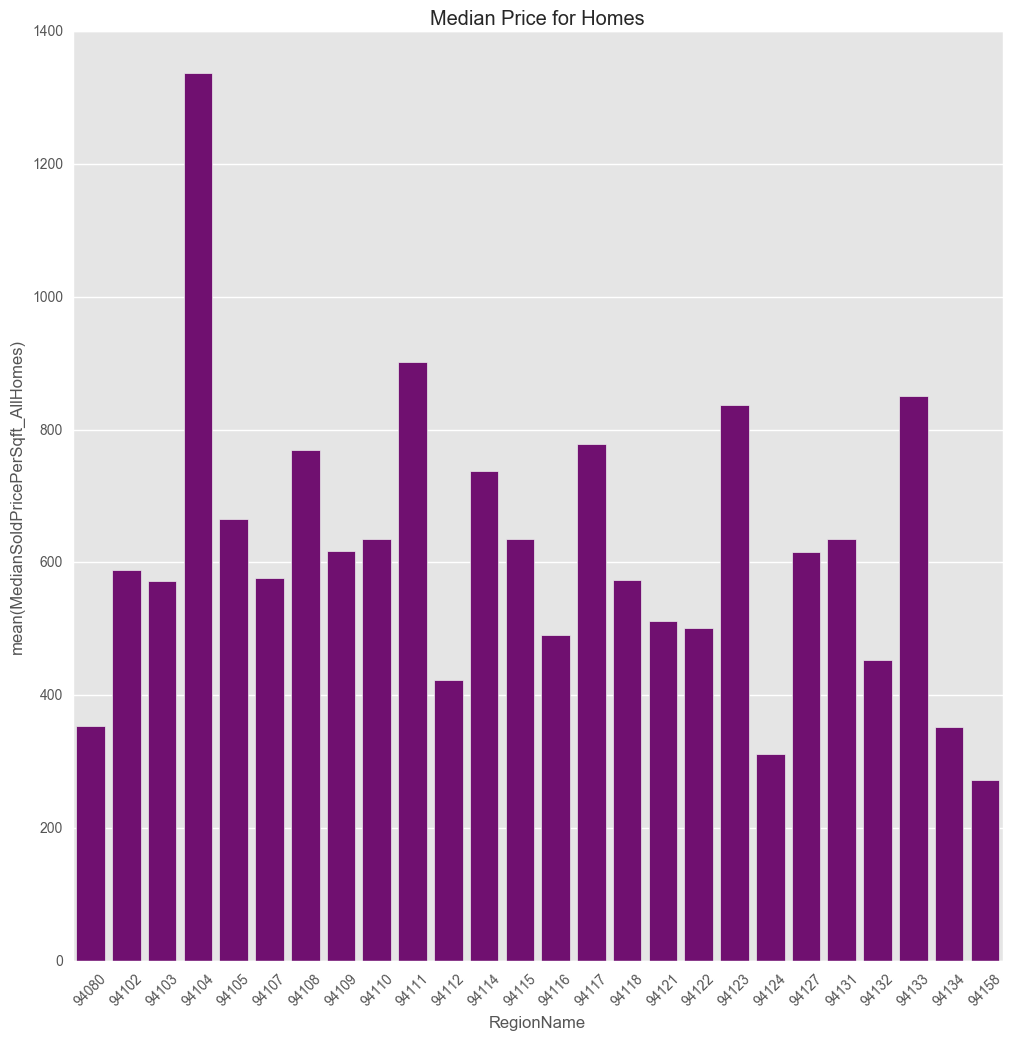

In [138]:
a = sns.barplot(x="RegionName", y="MedianSoldPricePerSqft_AllHomes", data=prices_zip,
            label="Total", color="purple")

for item in a.get_xticklabels():
    item.set_rotation(45) #rotate labels on x axis so you can read zipcodes
    
plt.title("Median Price for Homes")
plt.show()

In [139]:
import os
os.getcwd()

'/Users/hannah'

In [140]:
# load shape file for zip codes and look at only bay area ones
zips = gpd.read_file("Downloads/cb_2015_us_zcta510_500k/cb_2015_us_zcta510_500k.shp")
zips.head()
zips = zips[zips.ZCTA5CE10.str.startswith("9")]
#zips

In [141]:
#look at most and least expensive zipcodes
get_zips = [str(x) for x in prices_zip["RegionName"].values]
zips = zips.loc[zips["ZCTA5CE10"].isin(set(get_zips))]

#align and then break down dataframe to only include columns we want
zips["RegionName"] = zips["ZCTA5CE10"]
zips = zips.reset_index().sort_values(by="RegionName")
zips = zips[["RegionName", "geometry"]].reset_index(drop=True)

prices_zip = prices_zip.reset_index(drop=True).sort_values(by="RegionName")
#prices_zip

In [142]:
merged = pd.concat([zips, prices_zip["MedianSoldPricePerSqft_AllHomes"]], axis=1)

merged = merged[merged["RegionName"] != "94080"] #this zipcode is south bay, not SF

merged.head()

,RegionName,geometry,MedianSoldPricePerSqft_AllHomes
1,94102,"POLYGON ((-122.429929 37.777909, -122.426829 3...",901.804100
2,94103,"POLYGON ((-122.426418 37.765784, -122.426402 3...",850.666667
3,94104,"POLYGON ((-122.404613 37.793565, -122.401315 3...",836.363636
4,94105,"POLYGON ((-122.403456 37.787776, -122.401939 3...",777.939300
5,94107,"POLYGON ((-122.40509 37.76462799999999, -122.4...",769.973545


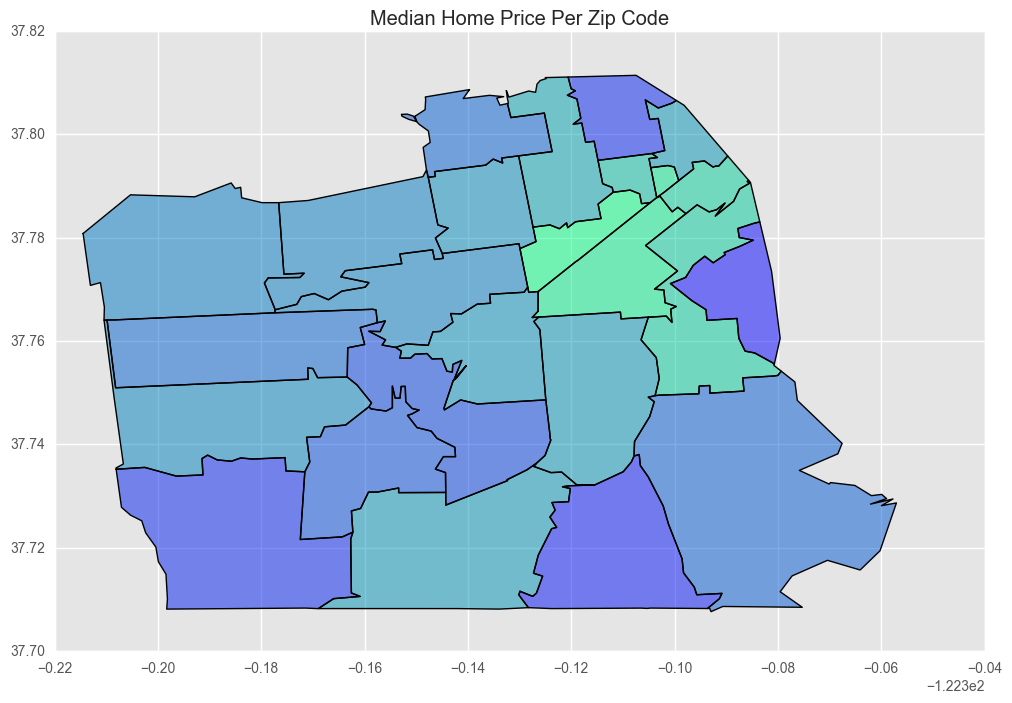

In [143]:
merged.plot(column='MedianSoldPricePerSqft_AllHomes', cmap="winter") #http://matplotlib.org/users/colormaps.html
plt.title("Median Home Price Per Zip Code")

<h3>Question 2: Where in the city do the most thefts happen? (I had my house keys stolen in Tenderloin once...)</h3>

In [144]:
theft = pd.read_sql("SELECT Descript, PdDistrict, Lon, Lat FROM crime WHERE Descript LIKE '%ROBBERY%'", db)
theft.head()

,Descript,PdDistrict,Lon,Lat
0,"ROBBERY, BODILY FORCE",TENDERLOIN,-122.414406,37.784191
1,"ROBBERY, ARMED WITH A KNIFE",MISSION,-122.432198,37.765111
2,"ROBBERY ON THE STREET, STRONGARM",CENTRAL,-122.406832,37.796903
3,"ROBBERY, BODILY FORCE",CENTRAL,-122.406832,37.796903
4,ATTEMPTED ROBBERY WITH A DEADLY WEAPON,TENDERLOIN,-122.413609,37.784697


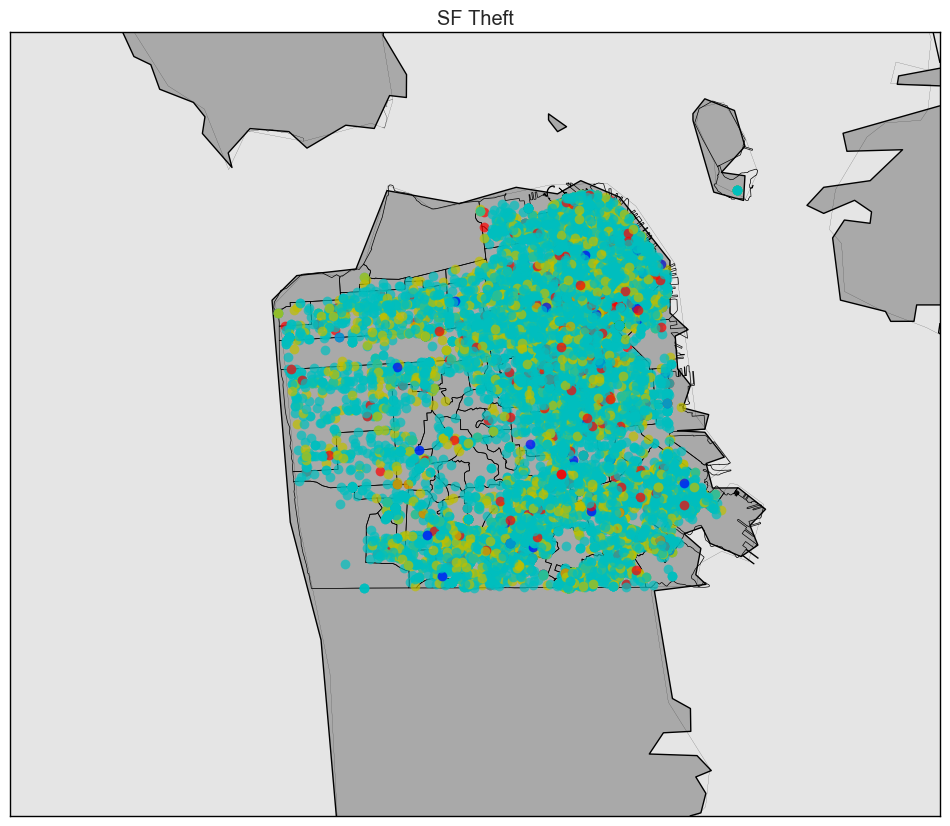

In [145]:
# basemap
theft_map = Basemap(projection="merc", llcrnrlon=-122.6, llcrnrlat=37.65, urcrnrlon=-122.3, urcrnrlat=37.85, resolution="h", area_thresh = 0.1)

# read in shapefile
theft_map.drawcoastlines()
theft_map.drawmapboundary()
theft_map.drawcounties()
theft_map.readshapefile("Downloads/SF Find Neighborhoods (1)/geo_export_c9468bff-f1a6-4d78-8adc-49622d5b3e16", "sfneighborhoods")

#make map grey so color shows up
theft_map.fillcontinents(color="darkgrey")

# add scatter points to the map
for lon, lat, description in zip(theft.Lon, theft.Lat, theft.Descript):
    x, y = theft_map(lon, lat)
    
    # ROBBERY, BODILY FORCE
    color = "c"
    
    # ROBBERY, ARMED WITH A KNIFE
    if description == "ROBBERY, ARMED WITH A KNIFE":
        color = "r"
    
    # ROBBERY ON THE STREET, STRONGARM
    if description == "ROBBERY ON THE STREET, STRONGARM":
        color = "y"
    
    # ATTEMPTED ROBBERY WITH A DEADLY WEAPON
    if description == "ATTEMPTED ROBBERY WITH A DEADLY WEAPON":
        color = "b"
        
    theft_map.plot(x, y, color + "o", markersize = 7, alpha = 0.7)
    
plt.title("SF Theft")
plt.show()

Answer: Q 1.2 -2 

From the plot above we can see that robberies are extremely common all over San Fransisco, but at least deadly weapon use is uncommon (as seen from the small amount of red and blue colored dots).

It seems that robbery with a knife is more concentrated around east San Fansisco but is still represented all over the map. It seems like you would need to keep good track of your belongings and your surroundings no matter what part of the city you happen to be in. 

<h3>Question 3: What areas are private schools most common in? </h3>


In [146]:
schools = pd.read_sql("SELECT * FROM schools", db)
schools.head()

,Name,Entity,LowerGrade,UpperGrade,GradeRange,Category,LowerAge,UpperAge,GeneralType,Address,Lat,Lon
0,Alamo Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"250 23RD AVE, San Francisco, CA 94121",37.783005,-122.482300
1,Alvarado Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"625 DOUGLASS ST, San Francisco, CA 94114",37.753681,-122.438194
2,Aptos Middle School,SFUSD,6,8,6-8,USD Grades 6-8,11,13,PS,"105 APTOS AVE, San Francisco, CA 94127",37.729672,-122.465782
3,Argonne Early Education School,SFUSD,-2,0,PK-TK,USD PreK/TK,3,5,PS,"750 16TH AVE, San Francisco, CA 94118",37.773968,-122.474060
4,Argonne Elementary School,SFUSD,0,5,K-5,USD Grades K-5,5,10,PS,"680 18TH AVE, San Francisco, CA 94121",37.775307,-122.476311


In [147]:
private = schools[schools["Category"] == "Independent / Private"]
private.head() #304 private schools in SF

,Name,Entity,LowerGrade,UpperGrade,GradeRange,Category,LowerAge,UpperAge,GeneralType,Address,Lat,Lon
127,Adda Clevenger School,Private,0,8,K-8,Independent / Private,5,13,IND,"198 FAIR OAKS ST, SAN FRANCISCO, CA 94110",37.753738,-122.424461
128,Alt School - Alamo Square,Private,0,5,K-5,Independent / Private,5,10,IND,"735 FELL ST, SAN FRANCISCO, CA 94117",37.774788,-122.430206
129,Alt School - Dogpatch 1,Private,-1,2,TK-2,Independent / Private,4,7,IND,"2265 03RD ST, SAN FRANCISCO, CA 94107",37.761177,-122.388130
130,Alt School - Dogpatch 2,Private,-1,2,TK-2,Independent / Private,4,7,IND,"610 20TH ST, SAN FRANCISCO, CA 94107",37.760662,-122.387962
131,Alt School - Fort Mason,Private,0,8,K-8,Independent / Private,5,13,IND,"3741 BUCHANAN ST, SAN FRANCISCO, CA 94123",37.804562,-122.433907


In [148]:
#want to extract zipcodes from Address column
address = private["Address"]
# use regular expressions to extract any continous six digit number
private['zip'] = private['Address'].str.extract('([0-9]{5})')
private

/Users/hannah/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/Users/hannah/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Entity,LowerGrade,UpperGrade,GradeRange,Category,LowerAge,UpperAge,GeneralType,Address,Lat,Lon,zip
127,Adda Clevenger School,Private,0,8,K-8,Independent / Private,5,13,IND,"198 FAIR OAKS ST, SAN FRANCISCO, CA 94110",37.753738,-122.424461,94110
128,Alt School - Alamo Square,Private,0,5,K-5,Independent / Private,5,10,IND,"735 FELL ST, SAN FRANCISCO, CA 94117",37.774788,-122.430206,94117
129,Alt School - Dogpatch 1,Private,-1,2,TK-2,Independent / Private,4,7,IND,"2265 03RD ST, SAN FRANCISCO, CA 94107",37.761177,-122.388130,94107
130,Alt School - Dogpatch 2,Private,-1,2,TK-2,Independent / Private,4,7,IND,"610 20TH ST, SAN FRANCISCO, CA 94107",37.760662,-122.387962,94107
131,Alt School - Fort Mason,Private,0,8,K-8,Independent / Private,5,13,IND,"3741 BUCHANAN ST, SAN FRANCISCO, CA 94123",37.804562,-122.433907,94123
132,Alt School - North Beach,Private,-1,8,TK-8,Independent / Private,4,13,IND,"838 KEARNY STREET, SAN FRANCISCO, CA 94108",37.795811,-122.404892,94108
133,Alt School - Potrero Hill,Private,-1,8,TK-8,Independent / Private,4,13,IND,"99 MISOURI ST, SAN FRANCISCO, CA 94107",37.765507,-122.396584,94107
134,Alt School - Soma,Private,6,8,6-8,Independent / Private,11,13,IND,"1245 FOLSOM ST, SAN FRANCISCO, CA 94103",37.774181,-122.410484,94103
135,Alt School - Yerba Buena,Private,-1,8,TK-8,Independent / Private,4,13,IND,"300 04TH ST, SAN FRANCISCO, CA 94107",37.781742,-122.401199,94107
136,Alta Vista School,Private,0,5,K-5,Independent / Private,5,10,IND,"413 SOMERSET ST, SAN FRANCISCO, CA 94134",37.726391,-122.407196,94134


In [151]:
private['zip'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

94115    31
94110    29
94118    22
94102    18
94116    17
94121    17
94112    15
94107    13
94132    13
94117    11
94131    11
94124    11
94122    11
94103    10
94114    10
94134     9
94108     9
94133     9
94127     8
94109     7
94123     6
94129     6
94105     6
94143     2
94130     1
94111     1
94158     1
Name: zip, dtype: int64

Answer 1.2 - 3

In our above analysis, we found the top 5 most expensive zip codes in the SF area. Now, we compare that list to the zipcodes we found with the most private schools. 

94104  - There were no private schools in this zip code at all.                     
94111  - There was only 1 private school in this zip code.                      
94133  - 9 private schools in this zip code                  
94123  - 6 private schools in this zip code                 
94117  - 11 private schools in this zip code

The zipcode with the most private schools - 94115 - was not on our top 5 most expensive neighborhoods list. It looks average price - wise from our bar plot. 

This is interesting, but it could makes sense since the most expensive zip codes are not necessarily where people live - ie the financial district. Also, some CEO types may not necessarily have a demand for schools since they spend more time on their career and don't have a family. 

I plotted the counts of private schools per zip code below. 

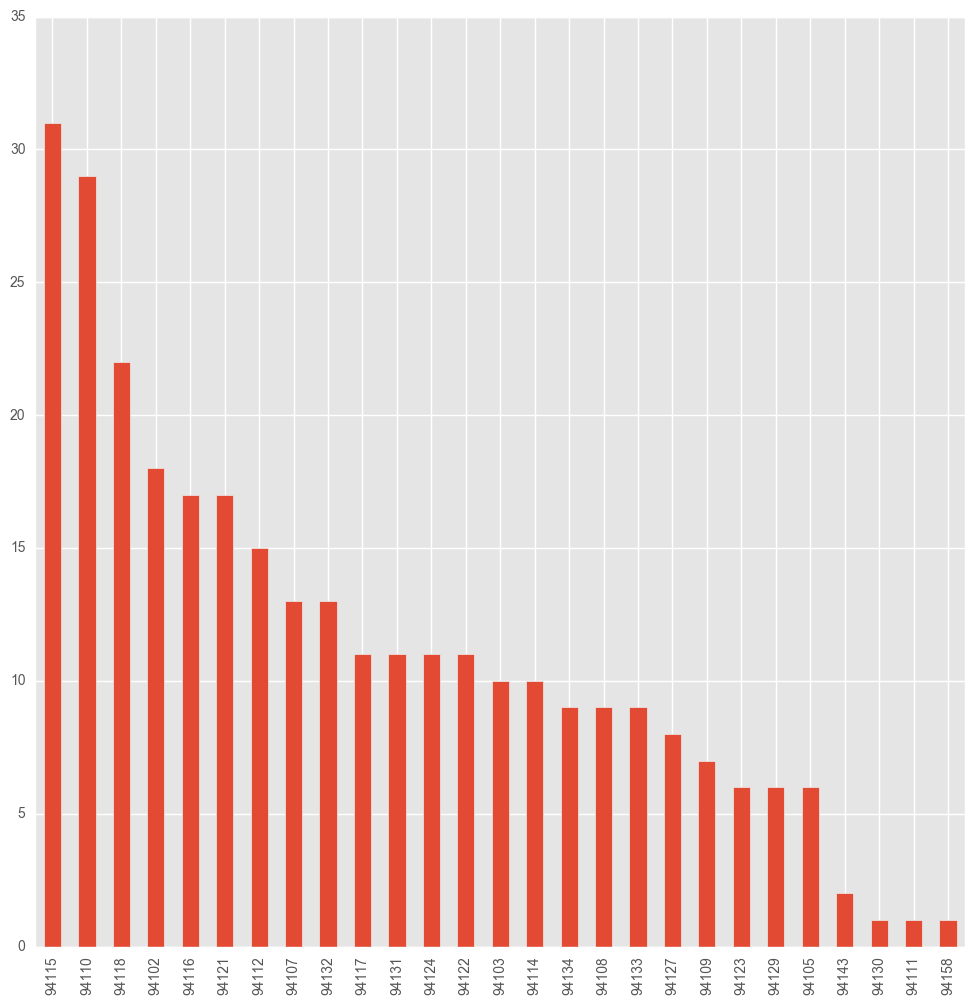

In [38]:
#plot of counts of private schools per zip code
private['zip'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).plot(kind='bar')

<h3>Question 4: What's the most common food truck item? </h3>

In [153]:
permits = pd.read_sql("SELECT * FROM mobile_food_permits", db)
permits = permits.drop_duplicates("Applicant")
#permits['FoodItems']

In [57]:
#look at common descriptions of food items
permits['FoodItems'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Hot dogs: condiments: soft pretzels: soft drinks: coffee: cold beverages: pastries: bakery goods: cookies: ice cream: candy: soups: churros: chestnuts: nuts: fresh fruit: fruit juices: desserts: potato chips and popcorn.                                                                                                                                                             2
COLD TRUCK. Deli: bbq chicken skewer: Chinese spring roll: Chinese fried rice/noodle: fried chicken leg/wing: bbq chicken sandwich: chicken cheese burger: burrito: lumpia. Snack: sunflower seeds: muffins: chips: snickers: kit-kat: 10 types of chocolate. Drinks: Coke: 7-Up: Dr. Pepper: Pepsi: Redbull: Vitamin Water: Rockstar: Coconut Juice: Water. Hot drinks: coffee: tea.    1
Sushi Burrito: Chicken Burrito: Tempura Burrito                                                                                                                                                                                                   

The food item descriptions vary a lot per vendor, so instead of this method I will make a wordcloud to see if a specific item shows up often within the description of the menus. 

In [154]:
foods = permits["FoodItems"].tolist()
type(foods)

list

In [155]:
from wordcloud import WordCloud, STOPWORDS
import random


In [159]:
stopwords = STOPWORDS
more_stopwords = set(["food", "truck"]) #stopwords are subjective
stopwords = set(stopwords).union(more_stopwords)

#want = [item for item in foods if item not in stopwords]
want = "".join(str([item for item in foods if item not in stopwords]))


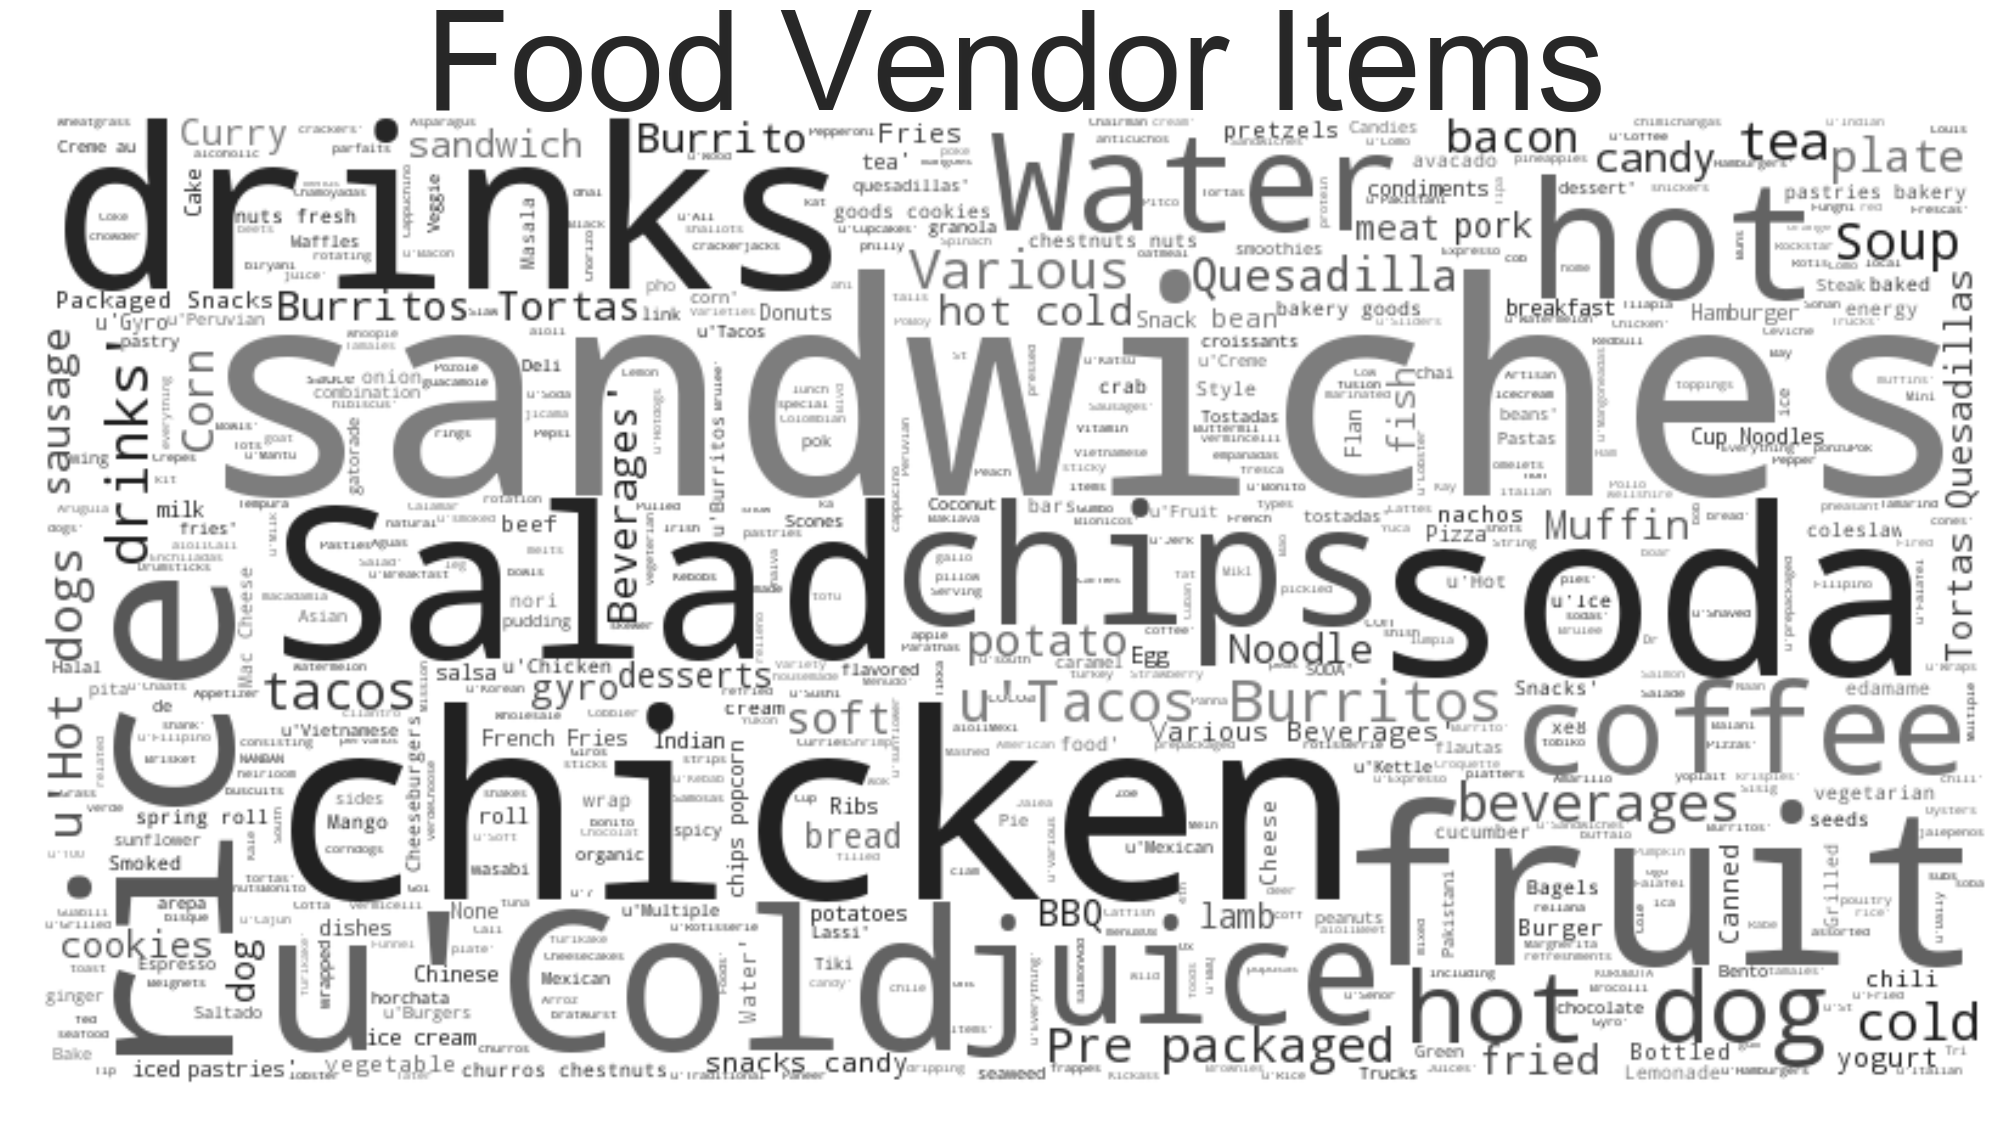

In [160]:
#Generate WordCloud image
wc = WordCloud(background_color = "white", max_words=5000, stopwords=stopwords, width=800, height=400)

    #Generate WordCloud
#for i in range(len(want)):
#    wanted = want[i]
    #print wanted
#wc.generate(foods[i in range(len(foods))])
wc.generate(want)
    #Coloring
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

    #Plotting
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Food Vendor Items", size = 100)
plt.show()

Answer 2.1 - 4

The wordcloud provides more helpful results from the value count results because it doesn't need an exact match for the entire sentence of the description; it only needs the words in order to find common occurences. Since it is a word cloud we don't exactly know the context of the words, but I think it's a safe bet in this case because of the set up of the database. 

From the above wordcloud, we see that the most common items that show up are sandwhiches, which make sense since they are easy to make with a small kitchen and to transport and also to eat on the go. 

After that, we see rice, fruit, chips, soda, salad, and chicken. This also makes sense because those are all food items that are easy to produce and sell in bulk and to eat on the go. 

<h3>Question 5: What's the most common type of police report? </h3>

In [162]:
#pd.read_sql("SELECT * FROM crime", db)

In [164]:
#look at the descriptions of crimes from the database
crimes = pd.read_sql("SELECT * FROM crime", db)
crimes = crimes.drop_duplicates("IncidntNum")
#crimes['Descript']

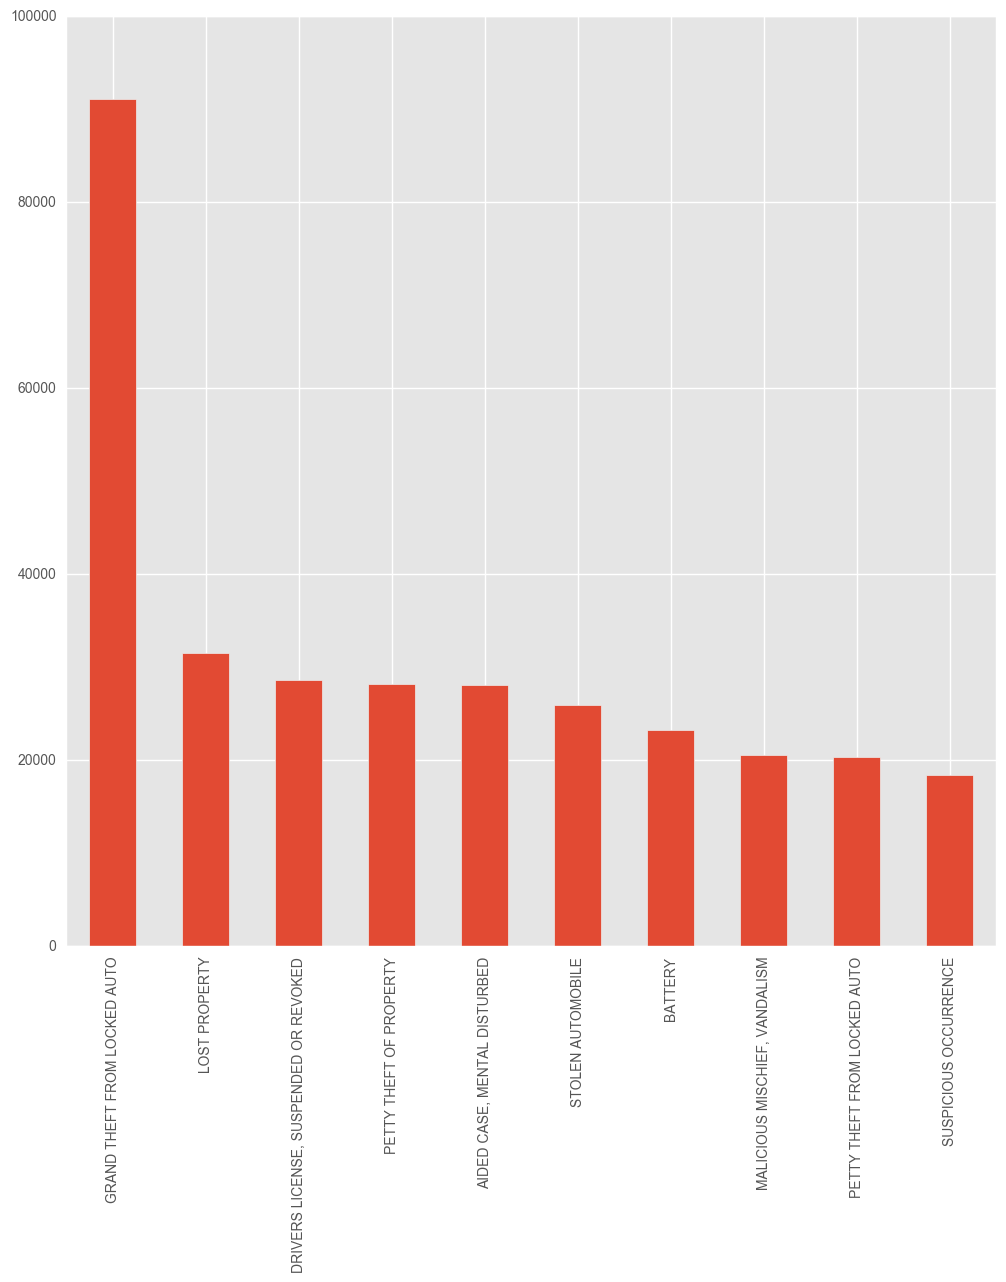

In [166]:
#we only want to look at the most common crime descriptions
values = crimes['Descript'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
values = values[0:10]
values.plot(kind='bar')

Answer 1.2 - 5

We see from the above output that by far the most common police report made in San Fransisco is "Grand Theft from Locked Auto" with approximately 90,000 occurences of the police report in this database. 

The second most common police report desciption is "Lost Property" and has about 30,000 occurences in this database -- three times less than "Grand Theft from Locked Auto".

It is at least, in a sense, comforting that the top 10 most common police reports are not violent towards another person except for one, battery. 

In [167]:
#close the connection
db.close()